In [3]:
from analysis import System
from analysis import graph_systems
import numpy as np


cutoff = 2.5e6
names = [("sagnac", "Sagnac"), ("microphone", "Sagnac"), ("split beam", "SplitBeam"), ("telescope", "Telescope")]
phis = ["phi" + str(int(np.append(82, np.linspace(145, 160, 16))[i])) + ".tdms" for i in range(len(np.append(82, np.linspace(145, 160, 16))))]
systems = np.array([])
for n in names:
    systems = np.append(systems, System(n[0], ["../data/20230801/" + n[1] + "/iter_0.tdms"] + ["../data/20230801/" + n[1] + "/MinDetect/" + i for i in phis], SNR_freq_cut = cutoff, phis = [int(p[3:-5]) for p in phis],  SNR_freq_range = [10000, cutoff], SNR_resolution = 100))

In [6]:
for s in systems:
    s.reset_SNR_vs_freq()
    s.calc_SNR_vs_freq(bins = True, lowpass = True)

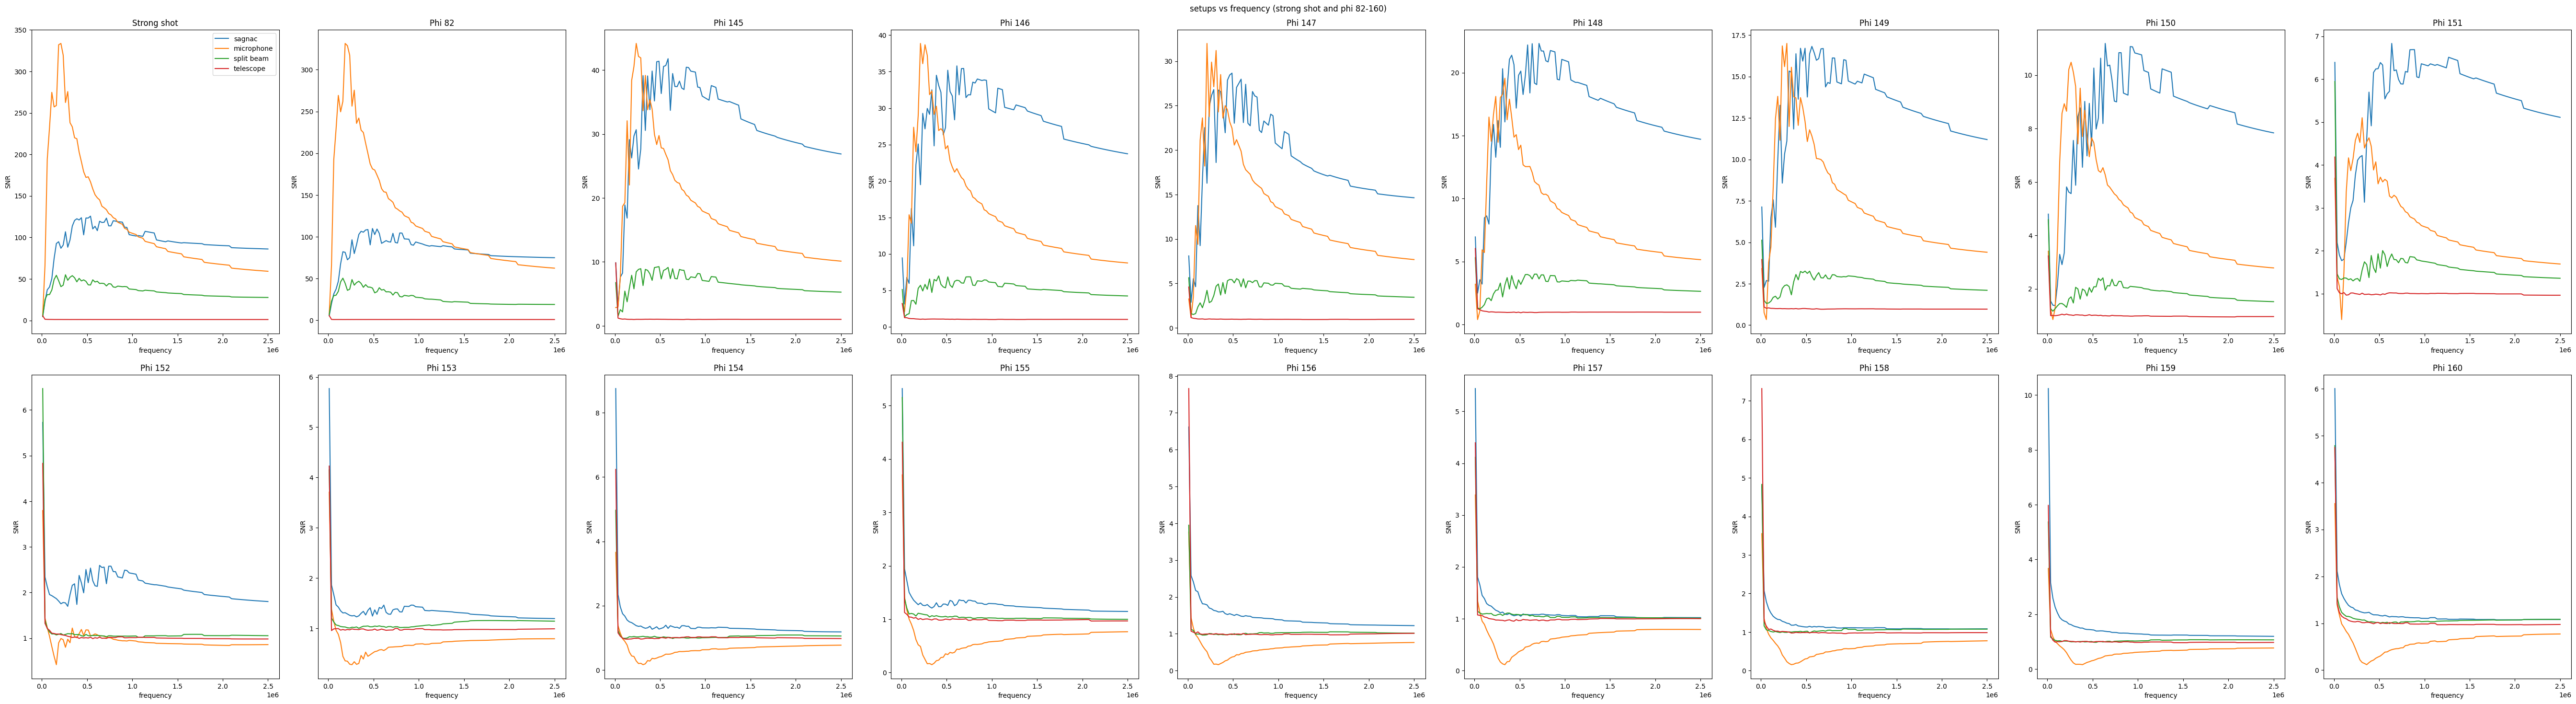

In [7]:
graph_systems(systems, "lowpass and bins: setups vs frequency with phi scan, resolution 100.png", True)